<a href="https://colab.research.google.com/github/debyyamamoto/trabalho_final_icd/blob/main/tp_icd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Introdução a Ciência de Dados**

---






Nome: Caroline Campos Carvalho, Deborah Brito Yamamoto, Iago Zagnoli Albergaria, Lucas André dos Santos

---



# **Motivação**

A motivação para a escolha desse tema surgiu da percepção do grupo sobre o aumento da frequência de notícias sobre massacres em escolas nos EUA. Esse cenário despertou nossa curiosidade em investigar possíveis relações de causalidade e estatísticas associadas ao tema. Nesse sentido, foi encontrada uma base de dados que contava com uma grande variedade de informações sobre cada ocorrência nos EUA no período de 1999 até 2022, o que nos motivou a seguir com o tema.

## **Introdução**

Este trabalho explorará algumas características identificadas por meio da análise de dados sobre tiroteios em escolas nos EUA.

##**Bibliotecas**

Antes de tudo, importar as bibliotecas utilizadas no projeto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.proportion as smp
from scipy import stats as ss
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Vários dos gráficos foram plotados utilizando a biblioteca plotly, que é uma biblioteca interativa que permite a criação de gráficos dinâmicos

# **Dados utilizados**

### Firearms Provisions in US States

Os dados abrangem todos os 50 estados dos EUA, de 1991 a 2017, e caracterizam sobre vários aspéctos a legislação de cada um durante o período analisado.



Fonte: [Firearms Provisions in US States](https://www.kaggle.com/datasets/jboysen/state-firearms/data)

In [ ]:
#Load Firearms Provisions in US States
df_firearms = pd.read_csv('https://raw.githubusercontent.com/debyyamamoto/data/main/raw_data.csv', sep = ',')

### Dataset de ocorrências de tiroteios

Dataset que mostra o registro de ocorrências de tiroteios em escolas desde Columbine até 2022.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/iagozag/icd/master/school-shootings-data.csv')

### Estados

Neste dataset, há o nome de cada sigla para realizar o merge posteriormente

In [ ]:
df_states = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')

### Population

Neste dataset, é mostrada a população de cada estado por ano.

In [ ]:
df_population = pd.read_csv('https://raw.githubusercontent.com/JoshData/historical-state-population-csv/primary/historical_state_population_by_year.csv', header=None)
df_population.rename(columns={2: 'pop'},  inplace=True)

### Gun Strength Law


Neste dataset, há uma quantificação de quão forte é a lei de cada estado, bem como da taxa de crime com armas naquele estado.

In [ ]:
df_strength = pd.read_csv('https://raw.githubusercontent.com/iagozag/icd/master/law_strength.csv',sep=';')

### Hate Crime

Nestes datasets, são detalhados a quantidade de casos de crimes de ódio reportados pela polícia nos Estados Unidos entre os anos de 2009 e 2022 agrupados por tipo de crime e motivação para o crime

In [ ]:
df_hate_crime = pd.read_csv("https://raw.githubusercontent.com/lucasandreds/Dados-crimes-de-odio-Estados-Unidos/main/Report%20Data%20export.csv")
for i in range(1,14):
  df2 = pd.read_csv(f"https://raw.githubusercontent.com/lucasandreds/Dados-crimes-de-odio-Estados-Unidos/main/Report%20Data%20export%20({i}).csv")
  df_hate_crime = pd.concat([df_hate_crime,df2])

## **Manipulação das tabelas**

Vamos começar o projeto com uma análise exploratória dos dados. O dataset a ser analisado é de ocorrências, que possui informações sobre tiroteios em escolas, desde o massacre em columbine, que foi em 1999 até o ano de 2022.



Vamos visualizar qual conteudo há nesse dataset atraves do ".head()"

In [ ]:
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


Vamos ver o nome das colunas, para ter uma visao mais abrangente dos dados.

In [ ]:
print(list(df.columns))

['uid', 'nces_school_id', 'school_name', 'nces_district_id', 'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week', 'city', 'state', 'school_type', 'enrollment', 'killed', 'injured', 'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1', 'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1', 'deceased_notes1', 'age_shooter2', 'gender_shooter2', 'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2', 'deceased_notes2', 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native', 'hawaiian_native_pacific_islander', 'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat', 'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county', 'state_fips', 'county_fips', 'ulocale']


Para conhecer qual o conteudo da tabela de estados, vamos dar um "head"

In [ ]:
df_states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Para conhecer qual o conteudo da tabela de população, vamos dar um "head"

In [ ]:
df_population.head()

,0,1,pop
0,AK,1950,135000
1,AK,1951,158000
2,AK,1952,189000
3,AK,1953,205000
4,AK,1954,215000


Fazer o merge dos dois datasets

In [ ]:
result = pd.merge(df, df_states, left_on='state', right_on='State', how='inner')

result.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale,State,Abbreviation
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,89.60,9,12,41,Jefferson County,8,8059,21.0,Colorado,CO
1,39,080723001239,Ranum High School,807230.0,Westminster 50,2/5/2003,2002-2003,2003,8:40 AM,Wednesday,...,68.00,9,12,524,Adams County,8,8001,21.0,Colorado,CO
2,82,080237000087,Platte Canyon High School,802370.0,"Platte Canyon, School District No. 1, Of The C...",9/27/2006,2006-2007,2006,11:40 AM,Wednesday,...,26.20,9,12,82,Park County,8,8093,43.0,Colorado,CO
3,115,080480001315,Deer Creek Middle School,804800.0,Jefferson County School District No. R-1,2/23/2010,2009-2010,2010,3:14 PM,Tuesday,...,28.20,7,8,60,Jefferson County,8,8059,21.0,Colorado,CO
4,153,080531000873,Arapahoe High School,805310.0,"Littleton, School District No. 6, In The Count...",12/13/2013,2013-2014,2013,12:30 PM,Friday,...,98.96,9,12,200,Arapahoe County,8,8005,21.0,Colorado,CO


In [ ]:
other_result = pd.merge(result, df_population, left_on='Abbreviation', right_on=0, how='inner')

other_result.head()


,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lunch,county,state_fips,county_fips,ulocale,State,Abbreviation,0,1,pop
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,Colorado,CO,CO,1900,543000
1,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,Colorado,CO,CO,1901,581000
2,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,Colorado,CO,CO,1902,621000
3,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,Colorado,CO,CO,1903,652000
4,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,Colorado,CO,CO,1904,659000


Como gera linhas maiores que o necessário, é importante pegar linhas que a coluna do ano é igual à coluna 1.

In [ ]:
right = other_result[other_result['year'] == other_result[1]]
right = right.drop([0,'State'], axis=1)
right.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale,Abbreviation,1,pop
99,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,9,12,41,Jefferson County,8,8059,21.0,CO,1999,4056133
223,39,080723001239,Ranum High School,807230.0,Westminster 50,2/5/2003,2002-2003,2003,8:40 AM,Wednesday,...,9,12,524,Adams County,8,8001,21.0,CO,2003,4528732
346,82,080237000087,Platte Canyon High School,802370.0,"Platte Canyon, School District No. 1, Of The C...",9/27/2006,2006-2007,2006,11:40 AM,Wednesday,...,9,12,82,Park County,8,8093,43.0,CO,2006,4720423
470,115,080480001315,Deer Creek Middle School,804800.0,Jefferson County School District No. R-1,2/23/2010,2009-2010,2010,3:14 PM,Tuesday,...,7,8,60,Jefferson County,8,8059,21.0,CO,2010,5047349
593,153,080531000873,Arapahoe High School,805310.0,"Littleton, School District No. 6, In The Count...",12/13/2013,2013-2014,2013,12:30 PM,Friday,...,9,12,200,Arapahoe County,8,8005,21.0,CO,2013,5269035


Adicionar o dataset de "Gun Law Strength" para análises posteriores.

In [ ]:
df_strength.head()

,state,Gun Law Strength,Gun Violence Rate
0,California,89.5,8.6
1,New York,83.5,5.3
2,Illinois,83.0,14.4
3,Connecticut,82.5,6.9
4,Massachusetts,81.0,3.7


Fazer o merge com a tabela anterior, para ter as colunas de população, Gun Law Strength e Gun Violence Rate.

In [ ]:
final_result = pd.merge(right, df_strength, left_on='state', right_on='state', how='inner')

final_result.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lunch,county,state_fips,county_fips,ulocale,Abbreviation,1,pop,Gun Law Strength,Gun Violence Rate
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,41,Jefferson County,8,8059,21.0,CO,1999,4056133,63.0,17.1
1,39,080723001239,Ranum High School,807230.0,Westminster 50,2/5/2003,2002-2003,2003,8:40 AM,Wednesday,...,524,Adams County,8,8001,21.0,CO,2003,4528732,63.0,17.1
2,82,080237000087,Platte Canyon High School,802370.0,"Platte Canyon, School District No. 1, Of The C...",9/27/2006,2006-2007,2006,11:40 AM,Wednesday,...,82,Park County,8,8093,43.0,CO,2006,4720423,63.0,17.1
3,115,080480001315,Deer Creek Middle School,804800.0,Jefferson County School District No. R-1,2/23/2010,2009-2010,2010,3:14 PM,Tuesday,...,60,Jefferson County,8,8059,21.0,CO,2010,5047349,63.0,17.1
4,153,080531000873,Arapahoe High School,805310.0,"Littleton, School District No. 6, In The Count...",12/13/2013,2013-2014,2013,12:30 PM,Friday,...,200,Arapahoe County,8,8005,21.0,CO,2013,5269035,63.0,17.1


## **Análise Exploratória dos dados**

**Vamos observar a tendência geral ao longo dos anos da ocorrência de massacres nos EUA**

Preparação do dataset de interesse

In [ ]:
ocorrencias_por_ano = df.loc[:, ['uid','year']]

Vamos plotar o gráfico

In [ ]:
fig = px.histogram(
    ocorrencias_por_ano,
    x = 'year',
    nbins = len(ocorrencias_por_ano['year'].unique()),
    color_discrete_sequence = px.colors.sequential.Sunset_r

)
fig.update_layout(
    title ={
        'text': "Ocorrências de massacre nos EUA",
        'y':0.95,
        'x':0.42,
        'xanchor': 'right',
        'yanchor': 'top'
    },
    xaxis_title_text = 'Ano',
    yaxis_title_text = 'Ocorrências',
    bargap = 0.2,

    paper_bgcolor = 'white',
    font = dict(
        family = "Arial, sans-serif",
        size = 13,
        color = "black"
    )
)
fig.show()

Observamos que, em geral, houve um crescimento do número de ocorrências de massacres em escolas ao longo dos anos.

**Incidentes por mês**

Preparação do dataset de interesse

In [ ]:
incidentes_por_mes = df.loc[:, ['uid', 'date', 'killed', 'injured', 'casualties']]
incidentes_por_mes['date'] = pd.to_datetime(incidentes_por_mes['date'])
incidentes_por_mes['month'] = incidentes_por_mes['date'].dt.month
months = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]
incidentes_por_mes['month'] = incidentes_por_mes['month'].apply(lambda x: months[x-1])

Vamos plotar o gráfico

In [ ]:
fig = px.histogram(
    incidentes_por_mes,
    x = 'month',
    color_discrete_sequence = px.colors.sequential.Sunset_r,

)


fig.update_xaxes(categoryorder='array', categoryarray=months)
fig.update_layout(
    title ={
        'text': "Ocorrências por mês",
        'y':0.95,
        'x':0.28,
        'xanchor': 'right',
        'yanchor': 'top'
    },
    xaxis_title_text = 'Mês',
    yaxis_title_text = 'Ocorrências',
    bargap = 0.2,
    font = dict(
        family = "Arial, sans-serif",
        size = 13,
        color = "black"
    )
)

fig.show()

**Vamos analisar o número de ocorrências por mês divididos em períodos:**

Separar os datasets de interesse

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
ocorrencias_por_mes_periodo1 = incidentes_por_mes.loc[(incidentes_por_mes['date'] >= '1999-01-01') & (incidentes_por_mes['date'] <= '2005-12-31')]
ocorrencias_por_mes_periodo2 = incidentes_por_mes.loc[(incidentes_por_mes['date'] >= '2006-01-01') & (incidentes_por_mes['date'] <= '2012-12-31')]
ocorrencias_por_mes_periodo3 = incidentes_por_mes.loc[(incidentes_por_mes['date'] >= '2013-01-01') & (incidentes_por_mes['date'] <= '2023-12-31')]


In [ ]:
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    "Ocorrências por mês nos anos [1999, 2005]",
    "Ocorrências por mês nos anos [2006, 2012]",
    "Ocorrências por mês nos anos [2013, 2023]"
])

# Primeiro histograma
fig1 = px.histogram(
    ocorrencias_por_mes_periodo1,
    x='month',
    color_discrete_sequence=px.colors.sequential.Sunset_r,
)
fig1.update_xaxes(categoryorder='array', categoryarray=months)

fig2  = px.histogram(
    ocorrencias_por_mes_periodo2,
    x='month',
    color_discrete_sequence=px.colors.sequential.Sunset_r,
)
fig2.update_xaxes(categoryorder='array', categoryarray=months)

fig3 = px.histogram(
    ocorrencias_por_mes_periodo3,
    x='month',
    color_discrete_sequence=px.colors.sequential.Sunset_r,
)
fig3.update_xaxes(categoryorder='array', categoryarray=months)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)
fig.update_xaxes(categoryorder='array', categoryarray=months)

fig.update_layout(
    yaxis_title_text = 'Ocorrências',
    bargap = 0.2,
    font = dict(
        family = "Arial, sans-serif",
        size = 13,
        color = "black"
    )
)


As ocorrências se concentram, em sua maioria, nos meses letivos, como já era de se esperar.

**Vamos verificar a relação entre a idade e o sexo dos autores dos massacres**

Preparação do dataset de interesse

In [ ]:
participantes = df.loc[:, ['age_shooter1', 'gender_shooter1', 'age_shooter2', 'gender_shooter2']]
#juntar dados em duas colunas
# Concatenar as colunas age_shooter1 e age_shooter2
combined_ages = pd.concat([participantes['age_shooter1'], participantes['age_shooter2']])
combined_genders = pd.concat([participantes['gender_shooter1'], participantes['gender_shooter2']]).reset_index(drop=True)
# Resetar o índice para garantir que não haja índices duplicados
combined_ages = combined_ages.reset_index(drop=True)

# Criar um novo DataFrame com as colunas combinadas
combined_participants = pd.DataFrame({
    'combined_age': combined_ages,
    'combined_gender': combined_genders
})
combined_participants = combined_participants.dropna()
# Resetar o índice do DataFrame resultante
combined_participants = combined_participants.reset_index(drop=True)

Vamos plotar o gráfico dos dados

In [ ]:
fig = px.box(
    combined_participants,
    x = 'combined_gender',
    y = 'combined_age',
    points = "all",
    color_discrete_map={"m": "blue", "f": "red"},
    color = 'combined_gender',
    height = 600,
    width = 900
)
fig.update_yaxes(range = [0, 80])
fig.update_layout(
    title="Idade dos envolvidos",
    xaxis_title="Sexo",
    yaxis_title="Idade",
    height=600,
    width=900
)

fig.show()

**Vamos analisar agora, a quantidade de mortes e feridos ao longo dos anos**

Preparação do dataset de interesse

In [ ]:
feridos_ao_longo_dos_anos = df.loc[:, ['year', 'killed', 'injured', 'casualties']]

Vamos plotar o gráfico

In [ ]:
soma_feridos_por_ano = feridos_ao_longo_dos_anos.groupby('year')['injured'].sum().reset_index()
soma_mortes_por_ano = feridos_ao_longo_dos_anos.groupby('year')['killed'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = soma_feridos_por_ano['year'],
    y = soma_feridos_por_ano['injured'],
    mode = 'lines+markers',
    name = 'Feridos',
    line=dict(color='red', width=2),
    marker=dict(color='red', size=8)
))

fig.add_trace(go.Scatter(
    x = soma_mortes_por_ano['year'],
    y = soma_mortes_por_ano['killed'],
    mode = 'lines+markers',
    name = 'Mortos',
    line=dict(color='black', width=2),
    marker=dict(color='black', size=8),

))
fig.update_layout(
    title="Soma de Mortes e Feridos ao Longo dos Anos",
    xaxis_title="Ano",
    yaxis_title="Número de Pessoas",
    height=600,
    width=900
)

## **Primeira pergunta**

Ao enfrentar uma dificuldade na primeira questão, mudamos a pergunta para **qual a probabilidade da arma ser de facil acesso para o atirador?** Seja por familia, amigos, casa dos amigos ou o próprio atirador.

Vamos considerar a seguinte hipótese nula:

**Hipótese Nula (H0): A probabilidade de uma arma ser de fácil acesso é 0,5.**

Para isso, podemos calcular o **intervalo de confiança** de armas que tiveram a origem "near" ou "no_near". Se não houver sobreposição, isso sugere uma diferença significativa entre as duas proporções.


In [ ]:
df_cleaned = right.dropna(subset=['weapon_source'])

df_cleaned['weapon_source'] = df_cleaned['weapon_source'].replace({
    "father": "near",
    "mother": "near",
    "parent": "near",
    "family home": "near",
    "stepfather": "near",
    "grandfather" : "near",
    "family member" : "near",
    "grandmother's boyfriend" : "near",
    "stepmother" : "near",
    "father's bedroom" : "near",
    "older brother" : "near",
    "relatives" : "near",
    "grandparents" : "near",
    "guardian (uncle)" : "near",
    "relative" : "near",
    "brother" : "near",
    "mom's gun; kept in her car" : "near",
    "uncle" : "near",
    "stepfather's bedroom" : "near",
    "father's gun, kept by 17 year old who shared room with shooter" : "near",
    "gift from grandparents":"near",
    "legally purchased by shooter": "near",
    "friend's home":"near",
    "puchased legally by shooter from Dicker & Deal":"near",
    "legally purchased at pawn shop that morning":"near",
    "classmate, who took from parents":"near",
    "contructed from parts legally purchased by shooter":"near",
    "legally purchased by shooter at Cabela's":"near",
    "owner's gun":"near",
    "legally owned by shooter":"near",
    "mother's friend, home shooter was staying":"near",
    "stolen from neighbor":"near",
    "legally purchased at gun show":"near",
    "purchased from someone in apartment complex":"near",
    "purchased legally by shooter":"near",
    "purchased from friends":"near",
    "boyfriend of child's mother" : "near",
    "puchased by shooter and friends":"near",
    "uncle's friend, found in open shoebox":"near"
})

#definir quais são other
df_cleaned['weapon_source'] = df_cleaned['weapon_source'].replace({
    "department issued": "no_near",
    "purchased from friend":"no_near",
    "stolen":"no_near",
    "police":"no_near",
    "ghost gun":"no_near",
    "police weapon":"no_near",
    "acquaintence of shooter":"no_near",
    "police issued weapon":"no_near",
    "police issued":"no_near",
    "illegally purchased":"no_near",
    "SRO":"no_near"
})


<ipython-input-396-f03e4ec6c887>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-396-f03e4ec6c887>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Para calcular o intervalo de confiança, vamos utilizar a função **"proportion_confint"** que irá tratar como uma binomial.

In [ ]:
# Dados
sucesso = len(df_cleaned[df_cleaned['weapon_source'] == 'near'])  # Número de sucessos
total = len(df_cleaned)   # Tamanho da amostra
conf_level = 0.95  # Nível de confiança

# Calculando o intervalo de confiança
conf_interval_legal = smp.proportion_confint(sucesso, total, alpha=1-conf_level, method='agresti_coull')

print(f"Intervalo de confiança de {conf_level*100}%: {conf_interval_legal}")


sucesso = len(df_cleaned[df_cleaned['weapon_source'] == 'no_near'])  # Número de sucessos

conf_interval_no_legal = smp.proportion_confint(sucesso, total, alpha=1-conf_level, method='agresti_coull')

print(f"Intervalo de confiança de {conf_level*100}%: {conf_interval_no_legal}")


Intervalo de confiança de 95.0%: (0.6107127046073404, 0.7879591974655795)
Intervalo de confiança de 95.0%: (0.19432389931288357, 0.3681093788997653)


É possível observar que os intervalos **não se sobrepoem**, mas para a melhor visualização, podemos fazer um gráfico.

0.7070707070707071


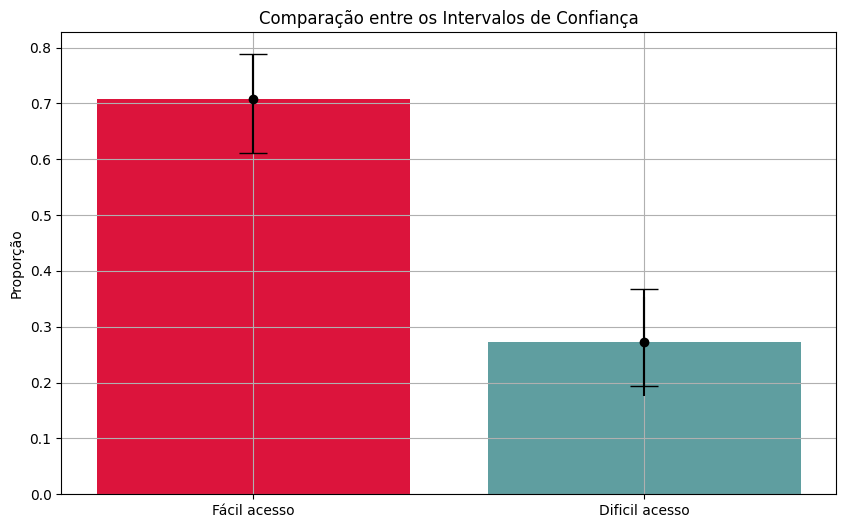

In [ ]:
# Calcula a probabilidade de cada categoria
prop_legal = df_cleaned['weapon_source'].value_counts()['near'] / len(df_cleaned)
prop_no_legal = df_cleaned['weapon_source'].value_counts()['no_near'] / len(df_cleaned)

print(prop_legal)

plt.figure(figsize=(10, 6))
categories = ['Fácil acesso','Dificil acesso']
means = [prop_legal, prop_no_legal]
errors_lower = [prop_legal - conf_interval_legal[0], prop_no_legal - conf_interval_no_legal[0]]
errors_upper = [conf_interval_legal[1] - prop_legal, conf_interval_no_legal[1] - prop_no_legal]

plt.bar(categories, means, yerr=[errors_lower, errors_upper], capsize=10, color=['crimson','cadetblue'])
plt.ylabel('Proporção')
plt.title('Comparação entre os Intervalos de Confiança')
plt.grid(True)

# Adicionando a linha do intervalo de confiança
plt.errorbar(categories, means, yerr=[[errors_lower[0]], [errors_upper[0]]], fmt='o', color='black')

plt.show()

**Como não há a sobreposicao dos intervalos, pode se concluir que há uma significativa diferenca entre as probabilidades, o que indica que a H0, que seupõe que ambas as probabilidades são iguais, não é satisfeita.**

Podemos fazer outra pergunta, **há uma probabilidade maior de ocorrer tiroteios em escolas públicas?** Para isso, vamos seguir os mesmos passos anteriores e comparar os intervalos de confiança.

Nossa hipótese nula é de que a probabilidade de ocorrência em escolas publicas é igual a 0,5.

In [ ]:
# Dados
sucesso = len(df[df['school_type'] == 'public'])  # Número de sucessos
total = len(df)   # Tamanho da amostra
conf_level = 0.95  # Nível de confiança

# Calculando o intervalo de confiança
conf_interval_legal = smp.proportion_confint(sucesso, total, alpha=1-conf_level, method='agresti_coull')

print(f"Intervalo de confiança de {conf_level*100}%: {conf_interval_legal}")


sucesso = len(df[df['school_type'] == 'private'])  # Número de sucessos

conf_interval_no_legal = smp.proportion_confint(sucesso, total, alpha=1-conf_level, method='agresti_coull')

print(f"Intervalo de confiança de {conf_level*100}%: {conf_interval_no_legal}")

Intervalo de confiança de 95.0%: (0.9090096331338601, 0.9583497330472047)
Intervalo de confiança de 95.0%: (0.04165026695279528, 0.09099036686613993)


É possível observar que os intervalos **não se sobrepoem**, mas para a melhor visualizacao, vamos fazer um gráfico.

0.9494949494949495


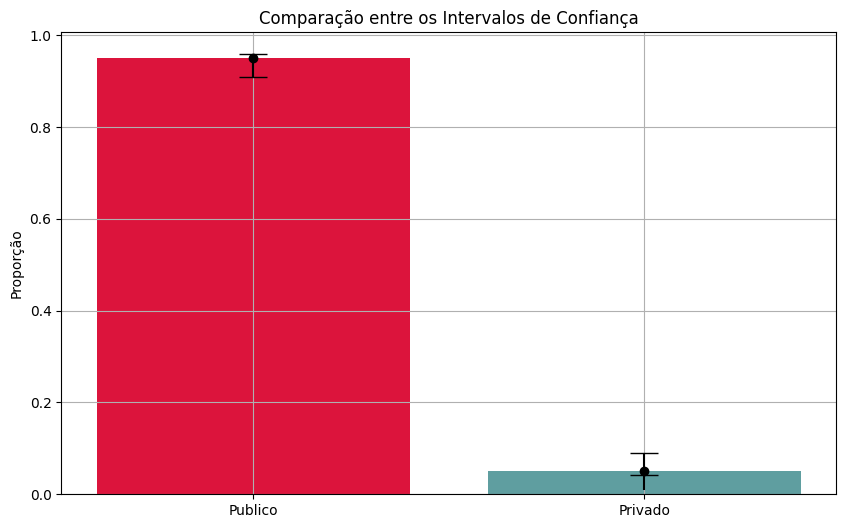

In [ ]:
# Calcula a probabilidade de cada categoria
prop_legal = df_cleaned['school_type'].value_counts()['public'] / len(df_cleaned)
prop_no_legal = df_cleaned['school_type'].value_counts()['private'] / len(df_cleaned)

print(prop_legal)

plt.figure(figsize=(10, 6))
categories = ['Publico','Privado']
means = [prop_legal, prop_no_legal]
errors_lower = [prop_legal - conf_interval_legal[0], prop_no_legal - conf_interval_no_legal[0]]
errors_upper = [conf_interval_legal[1] - prop_legal, conf_interval_no_legal[1] - prop_no_legal]

plt.bar(categories, means, yerr=[errors_lower, errors_upper], capsize=10, color=['crimson','cadetblue'])
plt.ylabel('Proporção')
plt.title('Comparação entre os Intervalos de Confiança')
plt.grid(True)

# Adicionando a linha do intervalo de confiança
plt.errorbar(categories, means, yerr=[[errors_lower[0]], [errors_upper[0]]], fmt='o', color='black')

plt.show()

**Como não há a sobreposicao dos intervalos, pode se concluir que há uma significativa diferença entre as probabilidades, o que indica que a H0, que supõe que ambas a probabilidades são iguais, não é satisfeita.**



## **Segunda pergunta**

**Qual a relação entre legalização de porte de armas e ocorrência de massacre?**

Para responder a essa pergunta, utilizaremos além do dataset principal, o dataset Firearms Provisions in US States.

In [ ]:
print(df_firearms.head())

        state  year  age18longgunpossess  age18longgunsale  \
0     Alabama  1991                    0                 0   
1      Alaska  1991                    0                 0   
2     Arizona  1991                    0                 0   
3    Arkansas  1991                    0                 0   
4  California  1991                    0                 1   

   age21handgunpossess  age21handgunsale  age21longgunpossess  \
0                    0                 0                    0   
1                    0                 0                    0   
2                    0                 0                    0   
3                    0                 0                    0   
4                    0                 1                    0   

   age21longgunsale  age21longgunsaled  alcoholism  ...  universal  \
0                 0                  0           1  ...          0   
1                 0                  0           0  ...          0   
2                 0       

Primeiro vamos separar as colunas de interesse de cada dataset

- No dataset df as seguintes foram consideradas interessantes para a resolução da pergunta: 'uid','date', 'state', que significam, respectivamente, o id de cada caso, a data do incidente e o estado onde cada incidente aconteceu. Após a seleção delas, foram feitas algumas alterações para facilitar o merge com a segunda tabela de interesse.

In [ ]:
#Seleção das colunas de interesse
colums_dt = df.loc[:, ['uid','date', 'state']]
#mudar data de df para que date apresente somente o ano
colums_dt['date'] = pd.to_datetime(colums_dt['date']).dt.year
#vamos adicionar um id para cada estado
colums_dt['id_estado'] = colums_dt['state'].astype('category').cat.codes
colums_dt.rename(columns={'date':'year'}, inplace =True)

- No dataset df_firearms, as seguintes colunas foram consideradas de interesse: 'state', 'year', 'permitlaw', que representam, respectivamente, o nome do Estado analisado, o ano da legislação analisada e se nela existe ou não a exigência de licença para a compra de armas.
- No dataset2, foram necessárias fazer algumas mudanças: os dados de interesse do distrito federal (Washington, D.C.) foram acrescentados, já que o dataset só analisava os estados dos EUA.
- Foi criada criada uma coluna com os mesmos ids de df para cada estado.
- Além disso, df_firearms só analisava os anos 1991 até 2017, por isso, limitamos a análise dos dois datasets a esse intervalo.

In [ ]:
#Seleção das colunas de interesse
colums_dt2 = df_firearms.loc[:,['state', 'year', 'permitlaw']]

#vamos adicionar os dados do District of Columbia
anos = list(range(1991, 2018))
dc = []

years = list(range(1991, 2018))
data_dc = {
    'state': ['District of Columbia'] * len(years),
    'year': years,
    'permitlaw': [1] * len(years),
}

df_dc = pd.DataFrame(data_dc)
colums_dt2 = pd.concat([colums_dt2, df_dc], ignore_index=True)

#vamos criar uma nova coluna de id_estado para colums_dt2, de forma que para todo state igual ao state em colums_dt, eles tenha o mesmo id_estado
# Criar um dicionário de mapeamento de estados para id_estado a partir de colums_dt
state_to_id = dict(zip(colums_dt['state'], colums_dt['id_estado']))

# Aplicar o mapeamento em colums_dt2 para criar a nova coluna id_estado
colums_dt2['id_estado'] = colums_dt2['state'].map(state_to_id)

# Converter a coluna id_estado para inteiro
colums_dt2['id_estado'] = colums_dt2['id_estado'].fillna(-1).astype(int)

Agora, vamos fazer o merge dos dois datasets resultantes e :

In [ ]:
#VAMOS FAZER O MERGE DAS DUAS TABELAS
merge_df = pd.merge(colums_dt, colums_dt2, on = ['id_estado', 'year', 'state'])

In [ ]:
print(merge_df.head())

   uid  year          state  id_estado  permitlaw
0    1  1999       Colorado          5          0
1    2  1999      Louisiana         18          0
2    3  1999        Georgia         10          0
3    4  1999   Pennsylvania         37          0
4    5  1999  Massachusetts         20          1


Vamos adicionar uma coluna com a somatória da ocorrência de massacres em cada estado.

In [ ]:
#adicionar uma coluna com a somatória de ocorrências de massacres em cada Estado
massacres_por_estado = merge_df.groupby('state').size().reset_index(name='massacre_count')
merge_df.loc[:, 'massacres_por_estado'] = merge_df['state'].map(massacres_por_estado.set_index('state')['massacre_count'])

Agora, vamos plotar um gráfico para visualizar a relação entre a exigência da licença para compra de armas e a ocorrência de massacres:

In [ ]:
#agora vamos começar a ver se existem relações entre a ocorrência de massacre em cada
#estado e a flexibilidade de compra de armas

#podemos comparar qual estado tem mais ocorrencias de massacres
color_discrete_sequence = px.colors.sequential.Viridis
merge_df = merge_df.sort_values(by='state')
fig = px.histogram(
                    merge_df,
                    x = merge_df['state'],
                    title = "Ocorrência de massacres em escolas dos EUA",
                    labels={'x' : 'Estados', 'y' : 'Ocorrências'},
                    color_discrete_sequence = px.colors.sequential.Sunset_r
                   )

#vamos criar um gráfico com os estados em x e a somatória da coluna permit de cada estado em y
valores_permit = merge_df.groupby('state')['permitlaw'].sum().reset_index(name='soma_permit')
fig_line = go.Figure()
fig_line.add_trace(go.Scatter(
    x = valores_permit['state'],
    y = valores_permit['soma_permit'],
    mode = 'lines+markers',
    name = 'Dessas ocorrências, quantas a legislação exigia licença para compra de armas',
    line=dict(color='orange', width=2),
    marker=dict(color='orange', size=8)
))

fig_combined = go.Figure(data=fig.data + fig_line.data)

fig_combined.update_layout(
    title='Ocorrência de Massacres e Flexibilidade de Compra de Armas por Estado',
    xaxis=dict(title='Estados'),
    yaxis=dict(title='Ocorrências de massacres', titlefont=dict(color='indigo')),
    yaxis2=dict(
        title='Somatória de Permits',
        titlefont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.99, y=0.9, xanchor='right', yanchor='top'),

    paper_bgcolor='white',
    font=dict(size=12)
)

fig_combined.show()

**Por meio da análise do gráfico acima, é possível concluir que a maior parte dos massacres ocorreram em estados que não possuiam a obrigatoriedade de licença para a compra de armas no ano analisado. Isso nos permite inferir, em primeira análise, que sim, existe uma ligação entre a alta flexibilidade na aquisição de armamentos e na incidência de massacres.**

Vamos agora considerar a população de cada estado na contagem, para termos uma melhor compreensão da quantidade de ocorrências em relação ao tamanho populacional.

Para isso vamos fazer o merge das tabelas df_states e df_population:

In [ ]:
#renomeando as colunas de cada dataset
df_states.rename(columns={1: 'sigla'}, inplace = True)
df_population.rename(columns={2: 'pop'},  inplace=True)
df_population.rename(columns={0: 'sigla'},  inplace=True)
df_population.rename(columns={1: 'year'},  inplace=True)
#converter as siglas em State para os nomes dos estados
merge_pop = pd.merge(df_states, df_population, right_on='sigla', left_on = 'Abbreviation', how = 'inner')
merge_pop.drop(merge_pop.columns[1], axis = 1, inplace = True)


Vamos fazer o merge desse dataset resultante com as colunas uid, date, state, de df.

In [ ]:
df_interesse = df.loc[:, ['uid','date', 'state']]
#mudar data de df para que date apresente somente o ano
df_interesse['date'] = pd.to_datetime(df_interesse['date']).dt.year

#vamos fazer o merge dessas duas tabelas
merge_dff = pd.merge(df_interesse, merge_pop, left_on = 'state', right_on = 'State', how = 'inner')
merge_dff = merge_dff[merge_dff['year'] == merge_dff['date']]
merge_dff.drop(merge_dff.columns[1], axis = 1, inplace = True)
merge_dff.drop(merge_dff.columns[1], axis = 1, inplace = True)

Agora, vamos fazer o mesmo procedimento feito para geração da tabela anterior, mas agora levando em consideração a população de cada estado.

In [ ]:
##DF2
colums_dt2 = df_firearms.loc[:,['state', 'year', 'permitlaw']]

#vamos adicionar os dados do District of Columbia
anos = list(range(1991, 2024))
dc = []

years = list(range(1991, 2024))
data_dc = {
    'state': ['District of Columbia'] * len(years),
    'year': years,
    'permitlaw': [1] * len(years),
}

df_dc = pd.DataFrame(data_dc)
colums_dt2 = pd.concat([colums_dt2, df_dc], ignore_index=True)

#vamos criar uma nova coluna de id_estado para colums_dt2, de forma que para todo state igual ao state em colums_dt, eles tenha o mesmo id_estado
# Criar um dicionário de mapeamento de estados para id_estado a partir de colums_dt
state_to_id = dict(zip(colums_dt['state'], colums_dt['id_estado']))

# Aplicar o mapeamento em colums_dt2 para criar a nova coluna id_estado
colums_dt2['id_estado'] = colums_dt2['state'].map(state_to_id)

# Converter a coluna id_estado para inteiro
colums_dt2['id_estado'] = colums_dt2['id_estado'].fillna(-1).astype(int)

#vamos fazer o merge
merge_pop_final = pd.merge(colums_dt2, merge_dff, left_on = ['state'], right_on = ['State'], how = 'inner')
merge_pop_final = merge_pop_final[merge_pop_final['year_y'] == merge_pop_final['year_x']]
merge_pop_final.drop(merge_pop_final.columns[1], axis = 1, inplace = True)
merge_pop_final.drop(merge_pop_final.columns[0], axis = 1, inplace = True)
#merge_pop.drop(merge_pop.columns[3], axis = 1, inplace = True)
merge_pop_final.rename(columns = {"year_y" : "year"}, inplace = True)
print(merge_pop_final.head())

     permitlaw  id_estado  uid    State sigla  year      pop
228          0          0  114  Alabama    AL  2010  4785437
253          0          0  136  Alabama    AL  2012  4815588
302          0          0  181  Alabama    AL  2016  4863525
303          0          0  184  Alabama    AL  2016  4863525
316          0          0  238  Alabama    AL  2017  4874486


Agora, vamos plotar o gráfico

In [ ]:
color_discrete_sequence = px.colors.sequential.Viridis

merge_pop_final = merge_pop_final.sort_values(by='State')
fig = px.histogram(
                    merge_pop_final,
                    x = merge_pop_final['State'],
                    y = merge_pop_final['State'].count()/merge_pop_final['pop']*1000000,
                    title = "Ocorrência de massacres em escolas dos EUA",
                    labels={'x' : 'Estados', 'y' : 'Ocorrências'},
                    color_discrete_sequence = px.colors.sequential.Sunset_r
                   )
fig.show()

Podemos concluir que, ao contrário do que o gráfico anterior sugeria, a Califórnia não é o estado com o maior número de massacres em relação à sua população.

Agora, vamos analisar a ocorrência de massacres em função da exigência de licença para a compra, utilizando um boxplot.

In [ ]:
color_map = {
    'Categoria1': 'green',  # Substitua 'Categoria1' pela categoria real e 'green' pela cor desejada
    'Categoria2': 'purple',  # Substitua 'Categoria2' pela categoria real e 'purple' pela cor desejada
}

fig = px.box(
    merge_df,
    x = 'permitlaw',
    y = 'massacres_por_estado',
    points = "all",
    color = "permitlaw",
    title = "Box Plot de Massacres por Estado e Lei de exigência de licença para a compra de armas",
    color_discrete_map=color_map
)
fig.update_layout(
    height=600,
    width=900
)
fig.show()

**É possível observar que a ocorrência de massacres é maior em estados que não exigem licença para a compra.**

**Vamos analisar o número de ocorrências com base na presença ou ausência da Lei de Arma de Fogo para maiores de 21 anos.**

Vamos separar o dataset de interesse.

In [ ]:
#Seleção das colunas de interesse
colums_dt2 = df_firearms.loc[:,['state', 'year', 'age21handgunpossess']]

#vamos criar uma nova coluna de id_estado para colums_dt2, de forma que para todo state igual ao state em colums_dt, eles tenha o mesmo id_estado
# Criar um dicionário de mapeamento de estados para id_estado a partir de colums_dt
state_to_id = dict(zip(colums_dt['state'], colums_dt['id_estado']))

# Aplicar o mapeamento em colums_dt2 para criar a nova coluna id_estado
colums_dt2['id_estado'] = colums_dt2['state'].map(state_to_id)

# Converter a coluna id_estado para inteiro
colums_dt2['id_estado'] = colums_dt2['id_estado'].fillna(-1).astype(int)

## VAMOS FAZER O MERGE DAS DUAS TABELAS
merge_df_age21 = pd.merge(colums_dt, colums_dt2, on = ['id_estado', 'year', 'state'])

#adicionar uma coluna com a somatória de ocorrências de massacres em cada Estado
massacres_por_estado = merge_df.groupby('state').size().reset_index(name='massacre_count')
merge_df_age21.loc[:, 'massacres_por_estado'] = merge_df['state'].map(massacres_por_estado.set_index('state')['massacre_count'])

Vamos plotar o gráfico

In [ ]:
color_map = {
    'Categoria1': 'green',  # Substitua 'Categoria1' pela categoria real e 'green' pela cor desejada
    'Categoria2': 'purple',  # Substitua 'Categoria2' pela categoria real e 'purple' pela cor desejada
}

fig = px.box(
    merge_df_age21,
    x = 'age21handgunpossess',
    y = 'massacres_por_estado',
    points = "all",
    color = "age21handgunpossess",
    title = "Box Plot de Massacres por Estado e Lei de Posse de Arma de Fogo maiores de 21 Anos",
    color_discrete_map=color_map
)
fig.update_layout(
    height=600,
    width=900
)
fig.show()

**Pode-se observar que a ocorrência de massacres é maior em estados que não exigem a idade mínima de 21 anos para a compra de armas de fogo.**

## **Terceira pergunta**

**Qual a relação entre a força da lei de armas e a ocorrência de massacres?**

**Para explorar essa relação, vamos analisar como está dispersão dos dados em um gráfico onde o eixo x é a força da lei e o eixo y é a quantidade de ocorrência de massacres.**

In [ ]:
final_result['pop'] = final_result['pop'].astype(int)
media = final_result.groupby('state')['pop'].mean().reset_index(name='media')

grouped = (final_result.groupby('state').size().reset_index(name='counts')*100000)
other_ = final_result.groupby('state')['Gun Law Strength'].mean().reset_index(name='Gun Law Strength')

Ao criar dois vetores, um da força da lei, que é representado no código abaixo por x e outro com a proporção de ocorrencias de massacres pela população, representado por y. **Essa proporção é necessária, porque estado com um número maior de pessoas, podem tender ter mais ocorrências de massacres. Então, para contornar essa variação, será trabalhado com proporção.**

In [ ]:
# Mesclar os DataFrames
merged_df = pd.merge(grouped, other_, on='state')
# x serão os estados e y serão as contagens
x = other_['Gun Law Strength']
y = grouped['counts']/media['media']

Abaixo é apresentado o gráfico de dispersão dos dados.

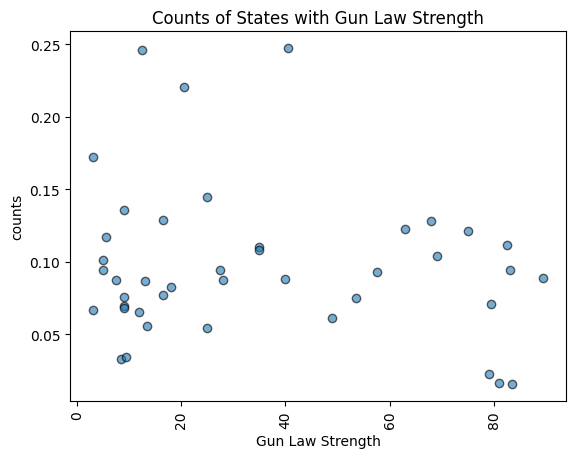

In [ ]:
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Gun Law Strength')
plt.ylabel('counts')
plt.title('Counts of States with Gun Law Strength')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x se necessário
plt.show()

É possível analisar **uma maior concentração do lado esquerd**o, por isso podemos ter uma melhor visualização dos dados em um histograma de duas dimensões.

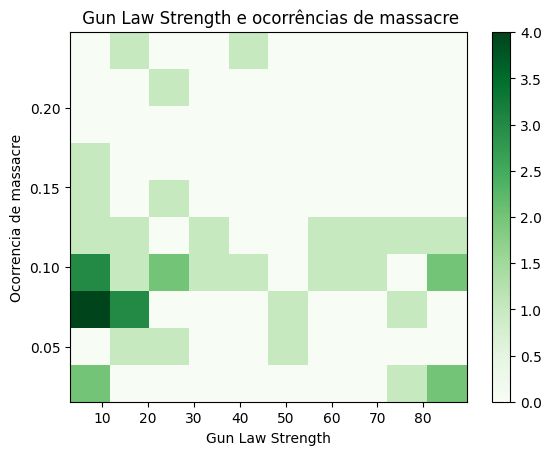

In [ ]:
plt.hist2d(x, y, bins=10, cmap='Greens')
plt.xlabel('Gun Law Strength')
plt.ylabel('Ocorrencia de massacre')
plt.title(' Gun Law Strength e ocorrências de massacre')
plt.colorbar()
plt.show()


Como pensado anteriormente, há uma maior concentração do lado esquerdo. O que há uma possível relação de quão maior for a força da lei, menor os casos de school shooting. Entretanto, para ter certeza, podemos aplicar uma **regressão linear** e encontrar uma função que relacione essas variáveis.

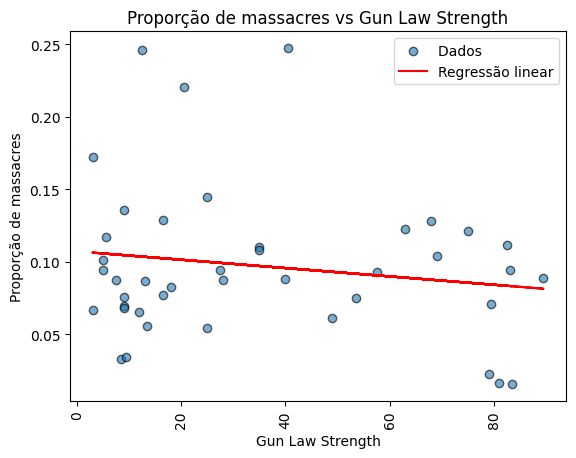

In [ ]:
reg = LinearRegression()
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
reg.fit(x, y)
y_pred = reg.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, edgecolor='k', alpha=0.6, label='Dados ')
plt.plot(x, y_pred, color='red', label='Regressão linear')

plt.xlabel('Gun Law Strength')
plt.ylabel('Proporção de massacres')
plt.title('Proporção de massacres vs Gun Law Strength')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x se necessário
plt.legend()
plt.show()

**É possível visualizar que há uma relação pequena onde, a cada vez que o rigor da lei aumenta, os casos de massacre diminuem.**

Outra análise possivel, é comparar com a taxa de violência daquele estado, ou seja, **se um estado for mais violento terá mais casos de school shooting?**

In [ ]:
final_result['pop'] = final_result['pop'].astype(int)
media = final_result.groupby('state')['pop'].mean().reset_index(name='media')

grouped = (final_result.groupby('state').size().reset_index(name='counts')*100000)
other_ = final_result.groupby('state')['Gun Violence Rate'].mean().reset_index(name='Gun Violence Rate')

In [ ]:
# Mesclar os DataFrames
merged_df = pd.merge(grouped, other_, on='state')
# x serão os estados e y serão as contagens
x = other_['Gun Violence Rate']
y = grouped['counts']/media['media']

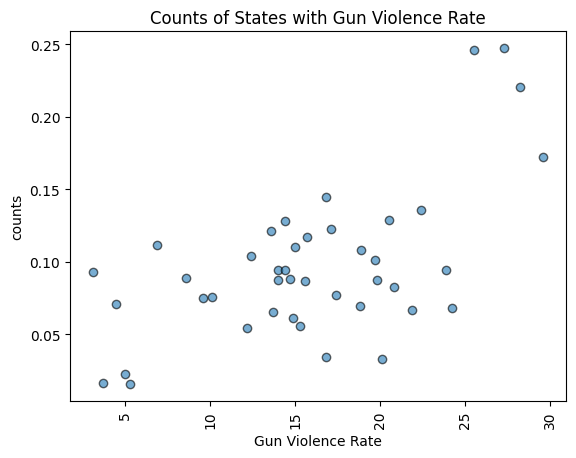

In [ ]:
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Gun Violence Rate')
plt.ylabel('counts')
plt.title('Counts of States with Gun Violence Rate')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x se necessário
plt.show()

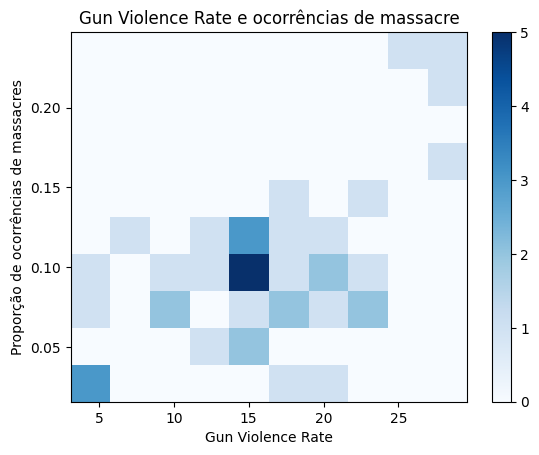

In [ ]:
plt.hist2d(x, y, bins=10, cmap='Blues')
plt.xlabel('Gun Violence Rate')
plt.ylabel('Proporção de ocorrências de massacres')
plt.title('Gun Violence Rate e ocorrências de massacre')
plt.colorbar()
plt.show()


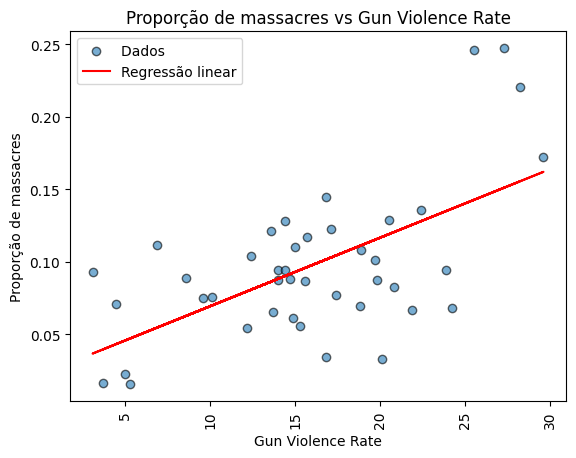

In [ ]:
reg = LinearRegression()
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
reg.fit(x, y)
y_pred = reg.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, edgecolor='k', alpha=0.6, label='Dados ')
plt.plot(x, y_pred, color='red', label='Regressão linear')

plt.xlabel('Gun Violence Rate')
plt.ylabel('Proporção de massacres')
plt.title('Proporção de massacres vs Gun Violence Rate')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x se necessário
plt.legend()
plt.show()

É possível analisar que há uma quantidade maior de massacres, à medida que a taxa de violencia aumenta. Ou seja, se um estado tiver uma taxa de violência com armas maior, é provavel que ocorra mais ocorrências de tiroteios em escolas.

## **Quarta Pergunta**

 A pergunta tem como objetivo **analisar a influência dos casos de crime de ódio com o aumento de massacres em escolas**, buscando verificar a influência do discurso preconceituoso das pessoas na motivação para o acontecimento dos massacres na escola

 Para quantificar o discurso preconceituoso na sociedade será utilizado as estatisticas ligadas aos casos de crimes de ódio, sendo eles crimes cometidos que o criminoso seleciona intencionalmente a sua vítima em função dela pertencer a algum grupo especifico. Desse modo, períodos no qual crimes de ódio são maiores tendem a possuir maior presença de discurso preconceituoso, permitindo assim a análise junto com os massacres na escola para identificar a relação entre eles.

### Análise exploratória dos dados

Para ser feita a análise será necessário utilizar o dataset de hate crime nos Estados Unidos junto com o dataset principal dos tiroteios em escola. Dado esses datasets, será analisada a tendência dos dados para comparar a relação entre eles.

####Variação dos dados

Iniciando com a observação dos dados de crime de ódio, será gerado o plot do número de casos agrupados, permitindo perceber a variação do número de casos de crime de ódio anualmente

Text(0.5, 0, 'Ano')

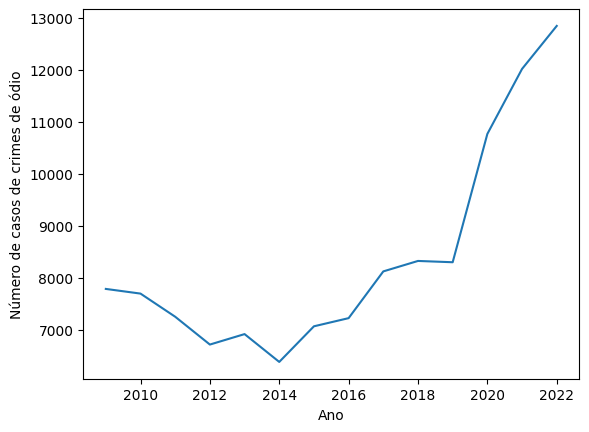

In [ ]:
df_hate_crime.groupby('Report data for year')['Recorded by Police'].sum().plot()
plt.ylabel('Número de casos de crimes de ódio')
plt.xlabel('Ano')

Analisando o número de casos de ódio percebe-se um declicio do número de casos de crime de ódio até 2014 e um aumento do número de casos de crime de ódio expressivo a partir de 2014 até 2022

O dataset dos tiroteios em escolas foi adaptado para contar o número de casos de tiroteios em escola anualmente no período observado pelo dataset dos crimes de ódio, assim gerando um plot para ser possível observar a variação do número de casos de tiroteios em escolas anualmente

Text(0.5, 0, 'Ano')

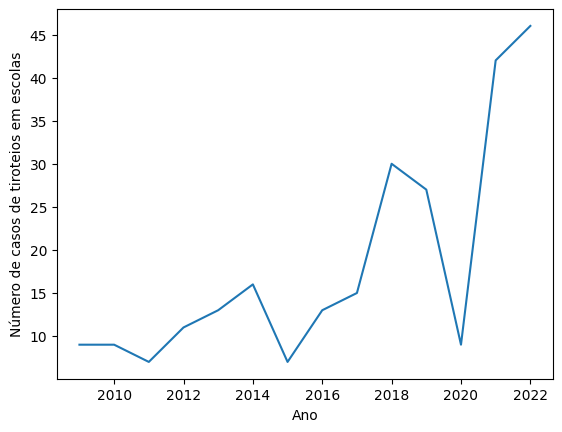

In [ ]:
df_school_anos = df.loc[:, ['uid', 'school_name','date', 'state']]
df_school_anos['date'] = pd.to_datetime(df_school_anos['date']).dt.year
df_school_anos['id_estado'] = df_school_anos['state'].astype('category').cat.codes
df_school_anos.rename(columns={'date':'year'}, inplace =True)

df_school_anos.query('year < 2023 and year > 2008').groupby('year')['uid'].count().plot()
plt.ylabel('Número de casos de tiroteios em escolas')
plt.xlabel('Ano')

Analisando o número de casos de ódio percebe-se que o número de casos de tiroteios em escolas possui uma variação semelhante ao número de casos de crime de ódio, permitindo uma análise melhor da relação através da regressão linear

####Dispersão dos dados

Inicialmente para permitir a análise direta da relação entre os dados será criado um dataframe separado com o ano, número de casos de crime de ódio e número de casos de tiroteios em escolas para realizar as análises nesse dataframe.

In [ ]:
df_comparacao = {}
df_comparacao['hateCrime'] = df_hate_crime.groupby('Report data for year')['Recorded by Police'].sum()
df_comparacao['schoolShotting'] = df_school_anos.query('year < 2023 and year > 2008').groupby('year')['uid'].count()
df_comparacao = pd.DataFrame(df_comparacao)
df_comparacao = df_comparacao.reset_index()
df_comparacao = df_comparacao.rename(columns={'index': 'Ano'})

Dado o dataframe selecionado, será gerado o gráfico de dispersão dos dados através do pairplot para analisar a relação entre os valores aplicados.


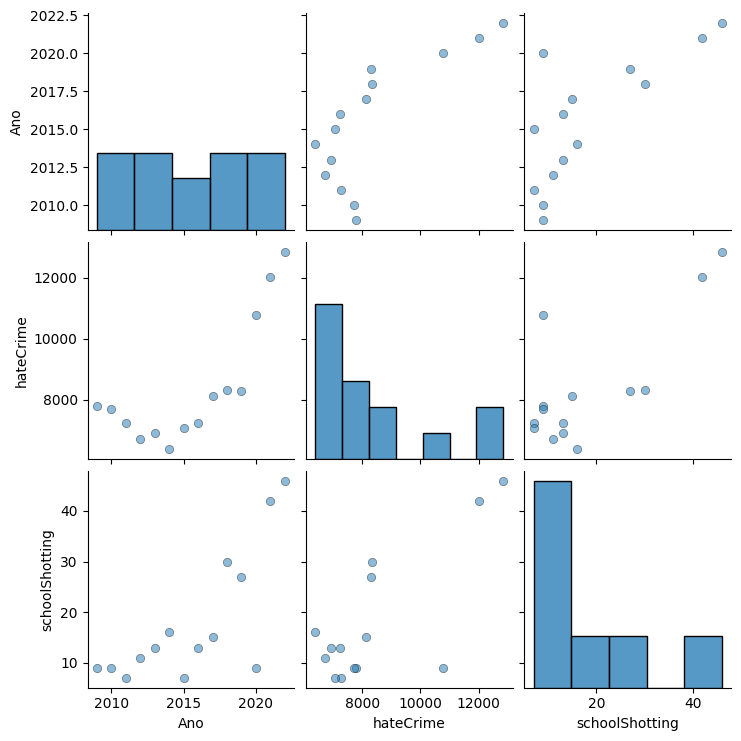

In [ ]:
sns.pairplot(df_comparacao, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

Observando a relação os dados parecem apresentar uma relação linear entre o tiroteio em escolas com o ano e os crimes de ódio, pertmindo a especulação da regressão linear dos dados

Porém, analisando a relação dos dados é perceptível um ponto claro de overfit em uma caso com uma taxa alta de crimes de ódio e baixa de tiroteios em escolas, sendo isso causado em 2020 devido a pandemia de Covid-19. Dado esse problema, foi escolhido retirar o dado para que ele não interfira negativamente na análie dos dados

In [ ]:
comparacao_sem_pandemia = df_comparacao
comparacao_sem_pandemia = df_comparacao.drop(df_comparacao[df_comparacao.index == 11].index)

##Regressão Linear

###Normalização e divisão em treino e teste

Para realizar a regressão, inicialmente os dados foram divididos em treino e teste para permitir a verificação da eficiencia do modelo, sendo 80% dos dados de treino e 20% de teste

In [ ]:
train_df, test_df = train_test_split(comparacao_sem_pandemia, test_size=0.2)

y_train_df = train_df['schoolShotting']
X_train_df = train_df.drop('schoolShotting', axis='columns')

y_test_df = test_df['schoolShotting']
X_test_df = test_df.drop('schoolShotting', axis='columns')

Em relação a normalização, foi utilizada a Standard Scaler para fazer a normalização do treino e do teste, sendo a normalização do teste feita a partir da média e do desvio padrão do treino

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train_df.values)
y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])

X_test = scaler_x.transform(X_test_df.values)
y_test = scaler_y.transform(y_test_df.values[:, np.newaxis])

###Modelo de Regressão linear

Para fazer a regressão linear foi escolhido usar a regressão linear básica da sklearn, criando o modelo a partir dos dados de treino e verificando os predicts para o treino e teste

In [ ]:
linear = LinearRegression(fit_intercept=True)
linear = linear.fit(X_train, y_train)
y_pred_train = linear.predict(X_train)
y_pred_test = linear.predict(X_test)

Dado o modelo, foi gerado os seguintes valores de verificação da confiabilidade do modelo

In [ ]:
print(f'Coeficientes: {linear.coef_[0]}')
print(f'Intercepto: {linear.intercept_[0]}')

Coeficientes: [0.51264015 0.52046377]
Intercepto: -5.473644334997811e-15


In [ ]:
print(f'Erro quadrático médio do treino: {mean_squared_error(y_train, y_pred_train)}' )
print(f'Valor R2 do treino: {r2_score(y_train, y_pred_train)}')

Erro quadrático médio do treino: 0.07508087113701141
Valor R2 do treino: 0.9249191288629885


In [ ]:
print(f'Erro quadrático médio do teste: {mean_squared_error(y_test, y_pred_test)}' )
print(f'Valor R2 do teste: {r2_score(y_test, y_pred_test)}')

Erro quadrático médio do teste: 0.16775920415258705
Valor R2 do teste: -2.5430743917026373


###Histogramas das estatísticas

Realizando diferentes execuções dos módulos anteriores foi perceptivel que devido ao baixo número de dados e a presença de variações complexas os valores de r2 score e erro quadrado média possuem variações extremas, incluindo valores maiores que 1 para o erro e valores negativos para o r2

Por isso, foi criado um bootstrap da criação do modelo de regressão linear de 1000 casos para testar diversas divisões do dataframe em treino e teste para pegar os diferentes valores possíveis de intercepto, coeficientes, erro quadrático médio e r2 score

In [ ]:
def bootstrap_regression(df, n=1000, size=None):
    if size is None:
        size = len(df)

    coeficientes1 = np.zeros(n)
    coeficientes2 = np.zeros(n)
    interceptos = np.zeros(n)
    errosQuadraticos = np.zeros(n)
    r2s = np.zeros(n)

    for i in range(n):
      sample = df.sample(size, replace=True)
      train_df, test_df = train_test_split(sample, test_size=0.2)
      y_train_df = train_df['schoolShotting']
      X_train_df = train_df.drop('schoolShotting', axis='columns')
      y_test_df = test_df['schoolShotting']
      X_test_df = test_df.drop('schoolShotting', axis='columns')
      scaler_x = StandardScaler()
      scaler_y = StandardScaler()
      X_train = scaler_x.fit_transform(X_train_df.values)
      y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])
      X_test = scaler_x.transform(X_test_df.values)
      y_test = scaler_y.transform(y_test_df.values[:, np.newaxis])
      linear = LinearRegression(fit_intercept=True)
      linear = linear.fit(X_train, y_train)
      y_pred_test = linear.predict(X_test)
      coeficientes1[i] = linear.coef_[0][0]
      coeficientes2[i] = linear.coef_[0][1]
      interceptos[i] = linear.intercept_[0]
      errosQuadraticos[i] = mean_squared_error(y_test, y_pred_test)
      r2s[i] = r2_score(y_test, y_pred_test)
    return coeficientes1,coeficientes2, interceptos,errosQuadraticos,r2s
coeficientes1,coeficientes2, interceptos,errosQuadraticos,r2s = bootstrap_regression(comparacao_sem_pandemia, n=1000, size=30)

Dado os valores gerados pelo bootstrap foi criado os seguintes valores de mediana e histograma dos valores

Mediana dos coeficiente da variável ano: 0.4768828836388984


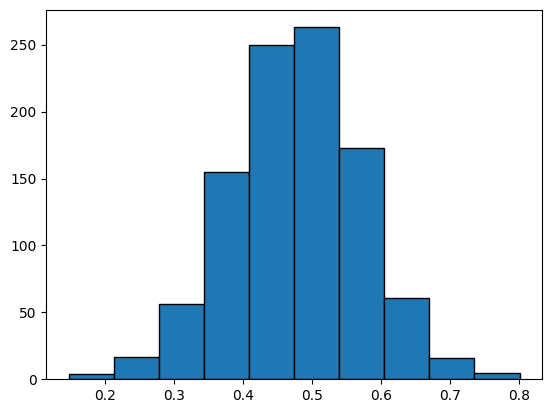

In [ ]:
plt.hist(coeficientes1, edgecolor='k')
print(f'Mediana dos coeficiente da variável ano: {np.median(coeficientes1)}')

Mediana dos coeficiente da quantidade de crimes de ódio: 0.5399281435054903


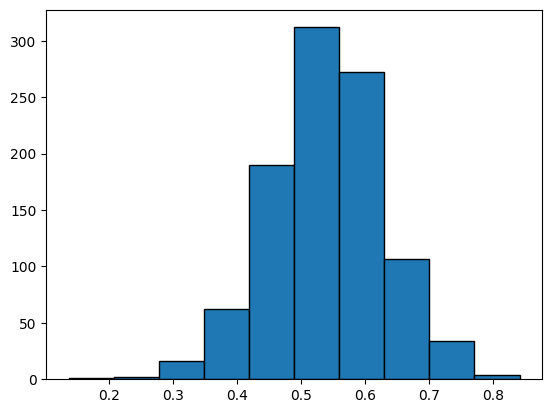

In [ ]:
plt.hist(coeficientes2, edgecolor='k')
print(f'Mediana dos coeficiente da quantidade de crimes de ódio: {np.median(coeficientes2)}')

Mediana da variável de intercepto: 1.8193454073733154e-17


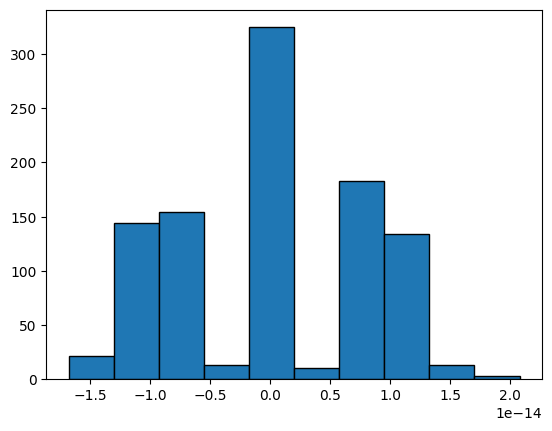

In [ ]:
plt.hist(interceptos, edgecolor='k')
print(f'Mediana da variável de intercepto: {np.median(interceptos)}')

Mediana dos erros quadráticos médios: 0.10288959986724007


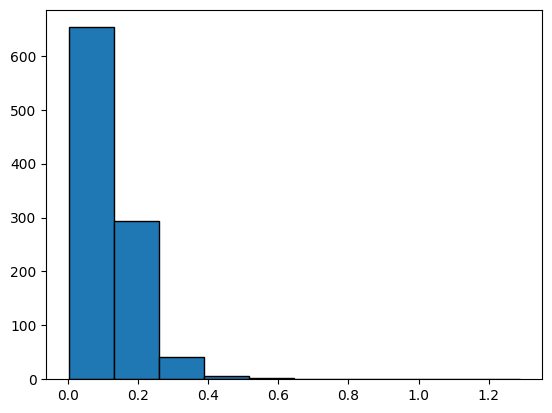

In [ ]:
plt.hist(errosQuadraticos, edgecolor='k')
print(f'Mediana dos erros quadráticos médios: {np.median(errosQuadraticos)}')

Mediana dos r2s scores: 0.8808190078612568


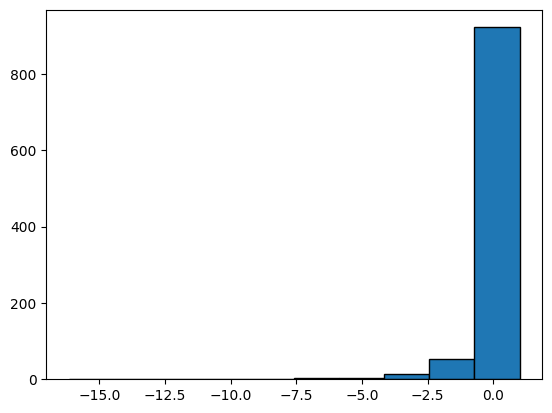

In [ ]:
plt.hist(r2s, edgecolor='k')
print(f'Mediana dos r2s scores: {np.median(r2s)}')

Analisando os dados, percebe-se que os valores dos coeficientes e do intercepto mantém padrões comuns em seus valores que não comprometem os resultados da regressão linear. Enquanto isso, os valores de erro quadrático médio possuem tendência para valores menores que 0.2 e do r2 score possuem tendência para valores maiores que 0.8, mesmo que possuam valores extremos para certas divisões de treino e teste.

Portanto, a tendência dos testes permanece em valores aceitáveis para comprovar a existência da relação entre a quantidade de casos de crimes de ódio e tiroteios em escolas, mesmo que a análise gere valores de precisão extremos devido ao baixo número de dados.

### Grafico da regressão Linear

Dado que foi provada a relação com alta confiabilidade dos dados com a regressão linear, foi gerado o gráfico através do regplot para registrar o gráfico linear nos dados e o seu intervalo de confiança

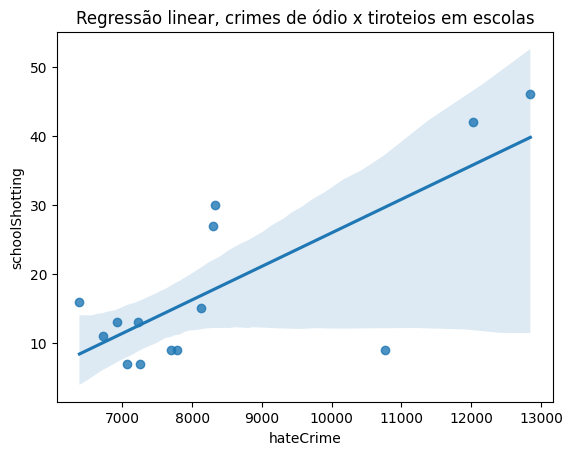

In [ ]:
sns.regplot(x='hateCrime', y='schoolShotting', data=df_comparacao)
plt.title('Regressão linear, crimes de ódio x tiroteios em escolas')
plt.show()

##**Conclusão**




Neste trabalho, foi possível desenvolver significativamente a habilidade do grupo em ciência de dados. Através da análise, identificamos uma relação muito forte entre tiroteios em escolas e fatores sociais, como a taxa de crimes com armas, a legalização do porte de armas, a ocorrência de crimes de ódio. Também identificamos uma correlação, embora não tão alta, entre a força das leis de armas em um estado e a ocorrência de tiroteios, onde estados com leis mais rigorosas tendem a ter menos incidentes. No entanto, essa relação menos evidente pode ser atribuída à limitação do dataset, que não continha informações completas sobre todos os anos, afetando a precisão da análise sobre a força das leis de armas em cada estado.